<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/homework_1/fastai_lesson1_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fastai_lesson1-redo- Using other image

Classic dataset of small (28x28) handwritten grayscale digits, developed in the 1990s for testing the most sophisticated models of the day; today, often used as a basic “hello world” for introducing deep learning. This fast.ai datasets version uses a standard PNG format instead of the special binary format of the original, so you can use the regular data pipelines in most libraries; if you want to use just a single input channel like the original, simply pick a single slice from the channels axis.
http://yann.lecun.com/exdb/mnist/



and some images from google(using case of lesson2)

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'CMPE258/fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline



In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.text import *


In [5]:
import fastai
import fastai.utils.collect_env
fastai.utils.collect_env.show_install(1)



```text
=== Software === 
python        : 3.6.9
fastai        : 1.0.60
fastprogress  : 0.2.2
torch         : 1.4.0
nvidia driver : 418.67
torch cuda    : 10.1 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 15079MB | Tesla T4

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython

Tue Feb 18 09:39:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+-------------

In [0]:
bs = 64


## Looking at the data

Classic dataset of small (28x28) handwritten grayscale digits, developed in the 1990s for testing the most sophisticated models of the day; today, often used as a basic “hello world” for introducing deep learning. This fast.ai datasets version uses a standard PNG format instead of the special binary format of the original, so you can use the regular data pipelines in most libraries; if you want to use just a single input channel like the original, simply pick a single slice from the channels axis.
http://yann.lecun.com/exdb/mnist/




In [7]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.MNIST,"mnist",base_dir)

In [63]:
path.ls()

[PosixPath('/content/gdrive/My Drive/CMPE258/fastai-v3/mnist_png/testing'),
 PosixPath('/content/gdrive/My Drive/CMPE258/fastai-v3/mnist_png/training')]

In [65]:
path_train = path/"training"
path_train.ls()

[PosixPath('/content/gdrive/My Drive/CMPE258/fastai-v3/mnist_png/training/2'),
 PosixPath('/content/gdrive/My Drive/CMPE258/fastai-v3/mnist_png/training/7')]

In [0]:
import os

#using ImageDataBunch.from_folder to import images

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


aother dataset from google image(which was done in lesson2's redo)

In [0]:
path2 = Path(base_dir + 'data')

In [51]:
for folder in ('panda', 'lion', 'bear'):
    print(folder)
    verify_images(path2/folder, delete=True, max_size=500)

panda


lion


bear


In [0]:
np.random.seed(42)
data2 = ImageDataBunch.from_folder(path2, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
classes = ('0','1', '2', '3','4','5','6','7','8','9')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [0]:
classes2 = ('panda', 'bear', 'lion')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

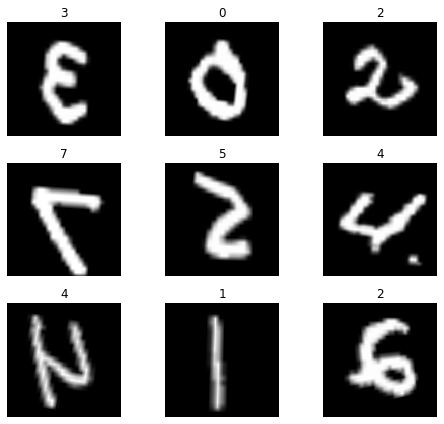

In [73]:
data.show_batch(rows=3, figsize=(7,6))

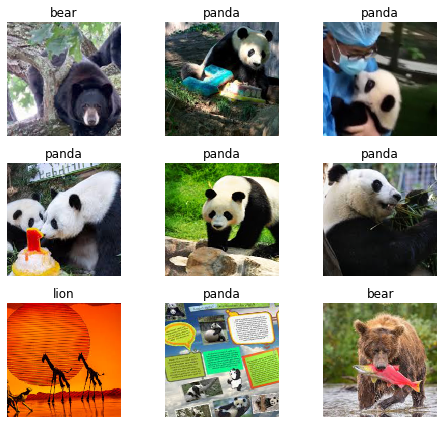

In [74]:
data2.show_batch(rows=3, figsize=(7,6))

In [75]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

In [76]:
print(data2.classes)
len(data.classes),data.c

['bear', 'lion', 'panda']


(10, 10)

## Training: resnet34

 use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. 
We will train for 4 epochs (4 cycles through all our data).

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

In [81]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.451052,0.221135,0.066907,02:30
1,0.245271,0.118812,0.039649,02:27
2,0.168947,0.090405,0.028159,02:24
3,0.141793,0.081640,0.025006,02:24


In [0]:
learn.save('stage-1-1')

#data2

In [0]:
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)

In [87]:
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [88]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.118497,0.213766,0.042453,00:10
1,0.617352,0.180702,0.056604,00:11
2,0.441271,0.182008,0.070755,00:11
3,0.333212,0.155471,0.061321,00:10


In [0]:
learn2.save('stage-2-1')

## Results

In [90]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

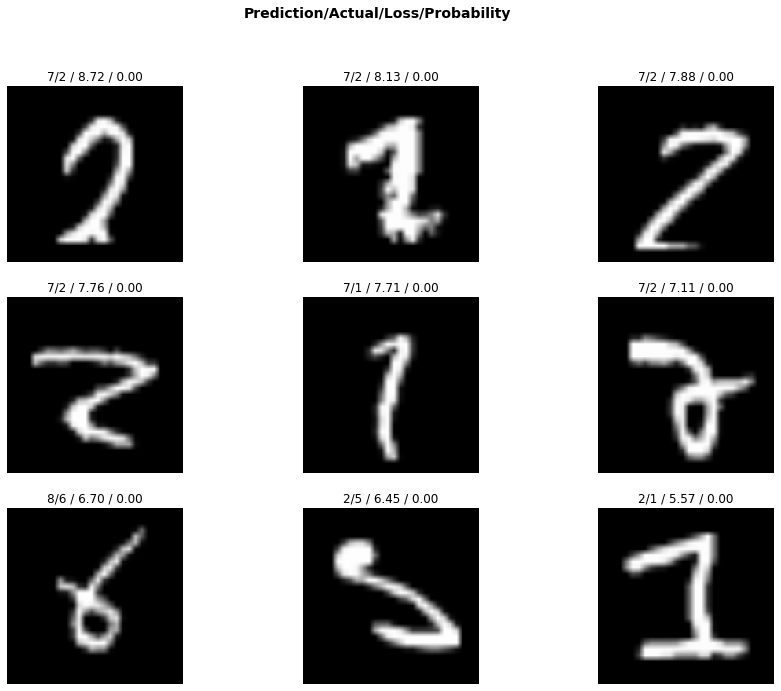

In [91]:
interp.plot_top_losses(9, figsize=(15,11))

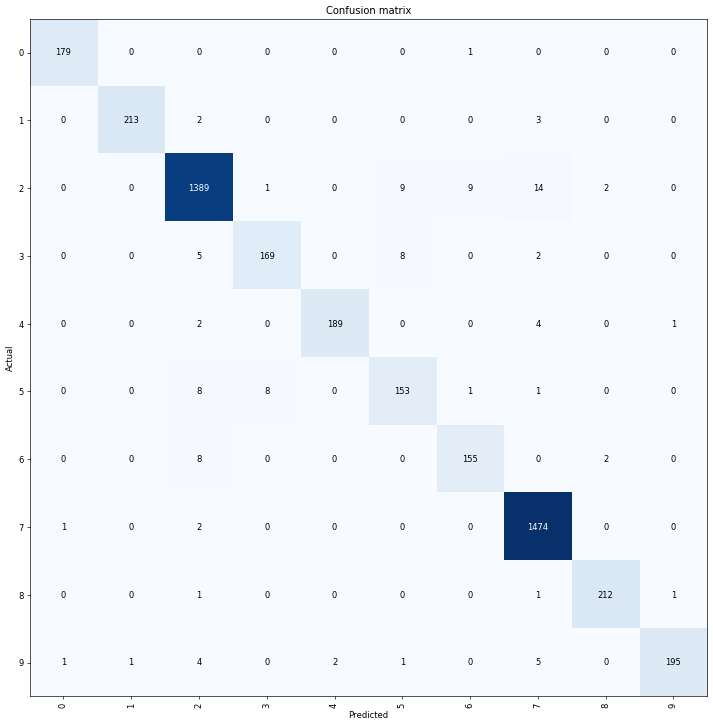

In [93]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [94]:
interp.most_confused(min_val=2)

[('2', '7', 14),
 ('2', '5', 9),
 ('2', '6', 9),
 ('3', '5', 8),
 ('5', '2', 8),
 ('5', '3', 8),
 ('6', '2', 8),
 ('3', '2', 5),
 ('9', '7', 5),
 ('4', '7', 4),
 ('9', '2', 4),
 ('1', '7', 3),
 ('1', '2', 2),
 ('2', '8', 2),
 ('3', '7', 2),
 ('4', '2', 2),
 ('6', '8', 2),
 ('7', '2', 2),
 ('9', '4', 2)]

#data2

In [95]:
interp2 = ClassificationInterpretation.from_learner(learn2)

losses2,idxs2 = interp2.top_losses()

len(data2.valid_ds)==len(losses2)==len(idxs2)

True

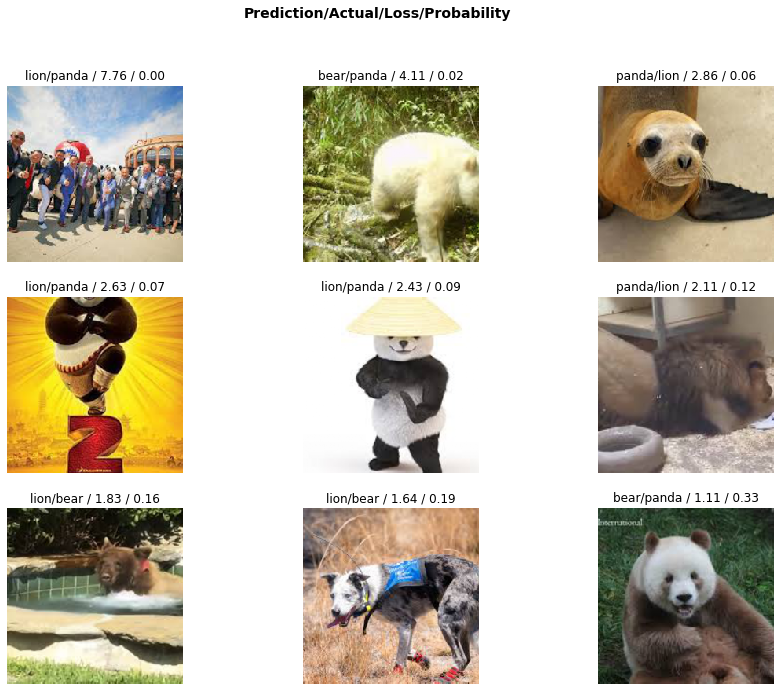

In [96]:
interp2.plot_top_losses(9, figsize=(15,11))

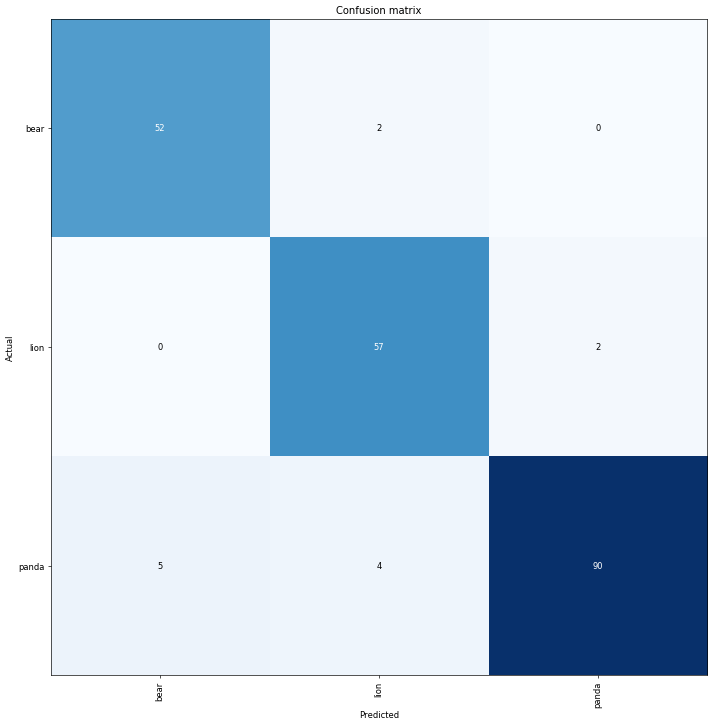

In [97]:
interp2.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [98]:
interp2.most_confused(min_val=2)

[('panda', 'bear', 5),
 ('panda', 'lion', 4),
 ('bear', 'lion', 2),
 ('lion', 'panda', 2)]

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [100]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.086399,0.040359,0.012615,02:32


In [0]:
learn.load('stage-1-1');

In [102]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


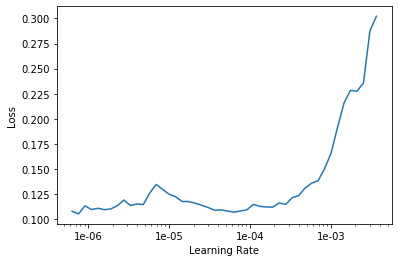

In [103]:
learn.recorder.plot()

In [104]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.097261,0.066209,0.022302,02:29
1,0.079149,0.053273,0.018022,02:30


do the same @ data2

In [0]:
learn2.unfreeze()

In [106]:
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.356071,0.183690,0.066038,00:11


In [0]:
learn2.load('stage-2-1');

In [108]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


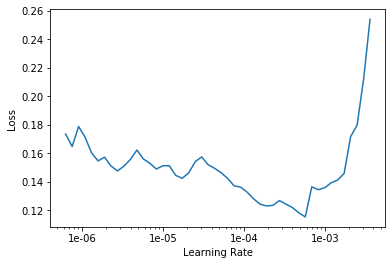

In [109]:
learn2.recorder.plot()

In [110]:
learn2.unfreeze()
learn2.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.140170,0.148138,0.051887,00:11
1,0.118229,0.128164,0.042453,00:11


## Training: resnet50

In [8]:
learn3 = cnn_learner(data2, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


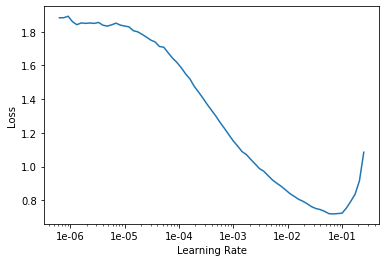

In [9]:
learn3.lr_find()
learn3.recorder.plot()

In [10]:
learn3.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.647236,0.145370,0.056604,00:58
1,0.388231,0.117818,0.033019,00:13
2,0.265409,0.169290,0.047170,00:12
3,0.208739,0.120813,0.047170,00:12
4,0.166584,0.101656,0.042453,00:13
5,0.152305,0.066136,0.028302,00:12
6,0.138175,0.067955,0.033019,00:12
7,0.120134,0.066363,0.033019,00:12


In [0]:
learn3.save('stage-2-50')

In [12]:
learn3.unfreeze()
learn3.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.045179,0.056977,0.033019,00:14
1,0.060548,0.055332,0.023585,00:13
2,0.047135,0.065121,0.028302,00:13


In [0]:
learn3.load('stage-2-50');

In [14]:
interp3 = ClassificationInterpretation.from_learner(learn3)

In [15]:
interp3.most_confused(min_val=2)

[('panda', 'bear', 3)]

## Other data formats

In [17]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

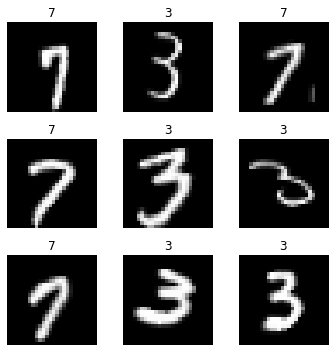

In [19]:
data.show_batch(rows=3, figsize=(5,5))

In [20]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.201976,0.085874,0.967125,00:18
1,0.134508,0.051579,0.984298,00:18


In [21]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

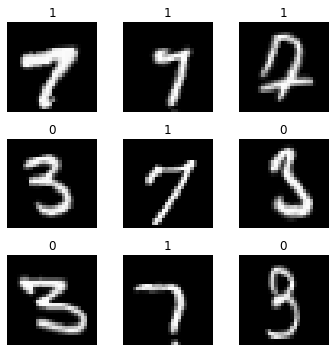

In [23]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [24]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [25]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [26]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

In [27]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [28]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']